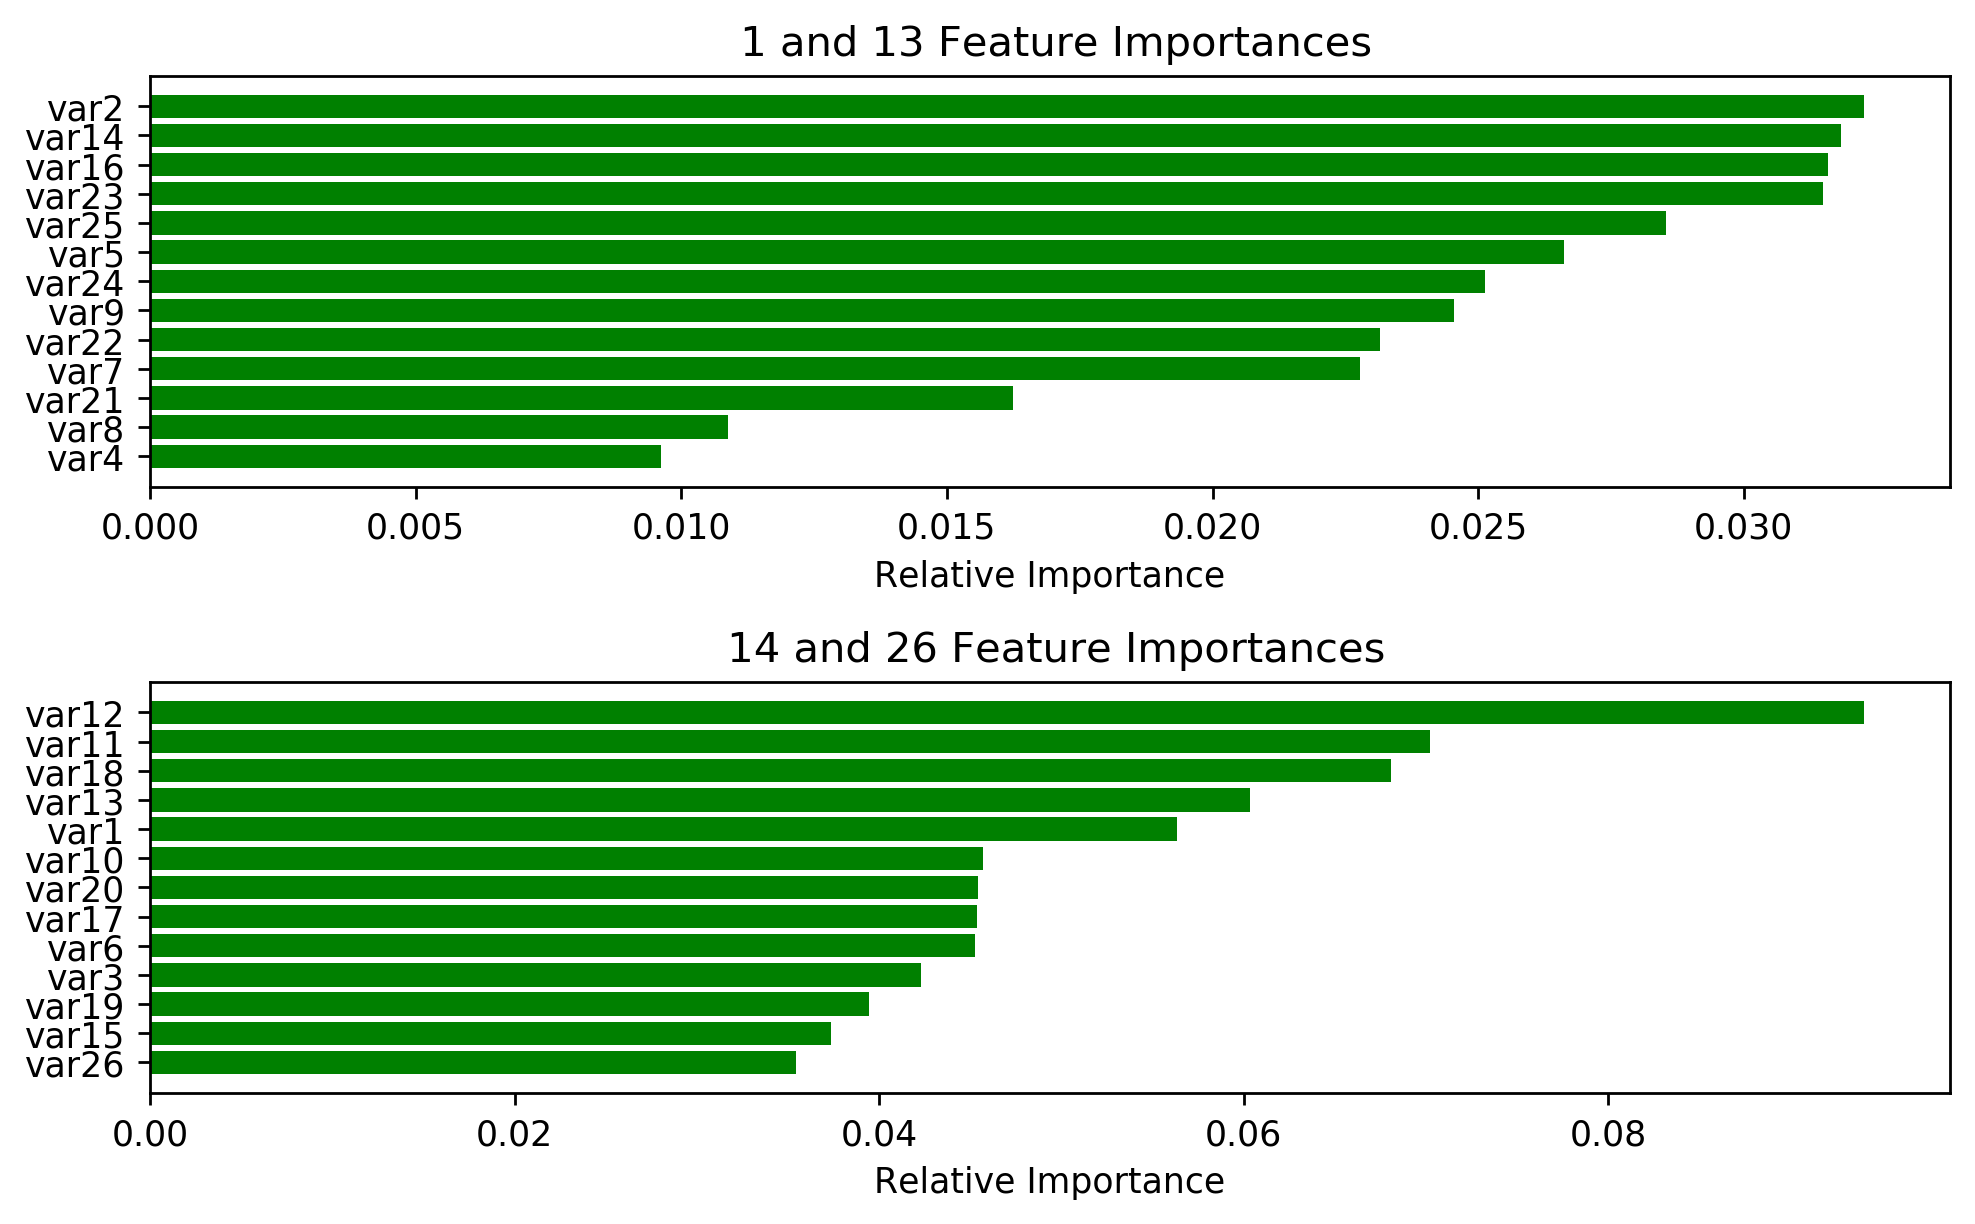

In [1]:
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import decomposition
data = pd.read_csv(r"C:\Users\Administrator\Desktop\table1_end_data.csv")
data = data.drop(columns = "id")
x = data.iloc[:,1:]
y = data.iloc[:,0]
#####已经确定选用核函数为poly时用26个变量进行降维处理并导出#############    
fig = plt.figure(figsize=[8,5] ,dpi = 250)   
kpca=decomposition.KernelPCA(n_components=26,kernel="poly")
kpca = kpca.fit_transform(x)
var_poly = ["var1","var2","var3","var4","var5","var6","var7","var8","var9"
       ,"var10","var11","var12","var13","var14","var15","var16","var17"
        ,"var18","var19","var20","var21","var22","var23","var24","var25"
       ,"var26"]
x_fe_poly = pd.DataFrame(kpca,columns = var_poly )
xx = pd.read_csv(r"C:\Users\Administrator\Desktop\table1_end_data.csv").iloc[:,0:2]
x_fe_poly_concat = pd.concat([xx , x_fe_poly] , axis = 1)
x_fe_poly_concat.to_csv(r"C:\Users\Administrator\Desktop\x_fe_poly.csv" , index = None)
fit_26 = RFR(n_estimators=20,random_state= 0).fit(x_fe_poly,y)
features = x_fe_poly.columns
importances =fit_26.feature_importances_ 

e = [0 , 13]
for k , i in enumerate(e):
    indices = np.argsort(importances )# features
    indices = indices[i:i+13]
    plt.subplot(2,1,k+1)
    plt.title(' %d and %d Feature Importances' % (i+1 , i+13))
    plt.barh(range(len(indices)), importances[indices], color='g', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
fig.tight_layout()
#plt.show()
plt.savefig(r"C:\Users\Administrator\Desktop\26var_Relative_Tmportance.jpg")

In [2]:
#### 导包和文件
import pandas as pd
import numpy as np
w_285 = pd.read_csv(r"C:\Users\Administrator\Desktop\285_02.csv")
y_285 = pd.read_csv(r"C:\Users\Administrator\Desktop\285_range_01.csv" )
w_285.head()
y_285.head()

k = 0
k_i = []
k_j = []
missing_285 = []
for j in range(w_285.shape[1]):
    for i in range(w_285.shape[0]):
        if w_285.iloc[i,j] < y_285.iloc[j,3] or w_285.iloc[i,j] > y_285.iloc[j,4]:
            w_285.iloc[i,j] = np.nan
            k_j.append(w_285.columns[j])
            k_i.append(w_285.index[i])
            k+=1
v_i = list(set(k_i))
v_j = list(set(k_j))
print("不在操作范围元素个数{},行数{},列数{} \n 列名{}".format(k,len(v_i),len(v_j),v_j))
col = v_j
for j in col:
    w = w_285.loc[:,j]
    h = np.isnan(w).sum()
    print("列名{},有超出范围的值有{}个".format(j,h))
    if h > 5:
        missing_285.append(j)
print("不在操作范围内大于5的列名{},有{}个".format(missing_285,len(missing_285)))

w_285_copy = w_285
w_285_copy.shape
for i in missing_285:
    w_285_copy.drop(columns = i , inplace = True)
w_285_copy.shape



#***********285标准化**********
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(w_285_copy)
scaler.mean_
scaler.var_
w_285_copy_std = scaler.transform(w_285_copy)
w_285_copy_std = pd.DataFrame(w_285_copy_std , columns = w_285_copy.columns)
w_285_copy_std.to_csv(r"C:\Users\Administrator\Desktop\285_std.csv")

不在操作范围元素个数200,行数40,列数5 
 列名['S-ZORB.FT_5201.PV', 'S-ZORB.FC_1101.TOTAL', 'S-ZORB.AI_2903.PV', 'S-ZORB.FT_1204.TOTAL', 'S-ZORB.SIS_LT_1001.PV']
列名S-ZORB.FT_5201.PV,有超出范围的值有40个
列名S-ZORB.FC_1101.TOTAL,有超出范围的值有40个
列名S-ZORB.AI_2903.PV,有超出范围的值有40个
列名S-ZORB.FT_1204.TOTAL,有超出范围的值有40个
列名S-ZORB.SIS_LT_1001.PV,有超出范围的值有40个
不在操作范围内大于5的列名['S-ZORB.FT_5201.PV', 'S-ZORB.FC_1101.TOTAL', 'S-ZORB.AI_2903.PV', 'S-ZORB.FT_1204.TOTAL', 'S-ZORB.SIS_LT_1001.PV'],有5个


In [3]:
w_313 = pd.read_csv(r"C:\Users\Administrator\Desktop\313_02.csv")
w_313 = w_313.drop(columns = "id")
y_313 = pd.read_csv(r"C:\Users\Administrator\Desktop\313_range_918_11.csv" )
k = 0
k_i = []
k_j = []
missing_313 = []
for j in range(w_313.shape[1]):
    for i in range(w_313.shape[0]):
        if w_313.iloc[i,j] < y_313.iloc[j,4] or w_313.iloc[i,j] > y_313.iloc[j,5]:
            w_313.iloc[i,j] = np.nan
            k_j.append(w_313.columns[j])
            k_i.append(w_313.index[i])
            k+=1
v_i = list(set(k_i))
v_j = list(set(k_j))
print("不在操作范围元素个数{},行数{},列数{} \n 列名{}".format(k,len(v_i),len(v_j),v_j))
col = v_j

for j in col:
    w = w_313.loc[:,j]
    h = np.isnan(w).sum()
    print("列名{},有超出范围的值有{}个".format(j,h))
    if h > 5:
        missing_313.append(j)
print("不在操作范围内大于5的列名{},有{}个".format(missing_313,len(missing_313)))

w_313_copy = w_313
w_313_copy.shape
for i in missing_313:
    w_313_copy.drop(columns = i , inplace = True)
w_313_copy.shape


#***********313标准化并导出**********
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(w_313_copy)
scaler.mean_
scaler.var_
w_313_copy_std = scaler.transform(w_313_copy)
w_313_copy_std = pd.DataFrame(w_313_copy_std , columns = w_313_copy.columns)
w_285_copy_std.to_csv(r"C:\Users\Administrator\Desktop\313_std.csv")

不在操作范围元素个数283,行数40,列数27 
 列名['S-ZORB.PT_6002.PV', 'S-ZORB.PT_9403.PV', 'S-ZORB.FT_9402.PV', 'S-ZORB.PT_2502.DACA', 'S-ZORB.PT_2501.DACA', 'S-ZORB.PDI_2801.DACA', 'S-ZORB.PC_2401.PIDA.SP', 'S-ZORB.SIS_LT_1001.PV', 'S-ZORB.AT-0006.DACA.PV', 'S-ZORB.PC_3101.DACA', 'S-ZORB.PC_2401.DACA', 'S-ZORB.PC_6001.PV', 'S-ZORB.FT_1204.TOTAL', 'S-ZORB.TE_1603.DACA', 'S-ZORB.PDI_2301.DACA', 'S-ZORB.PDC_2607.PV', 'S-ZORB.AT-0012.DACA.PV', 'S-ZORB.PC_2401B.DACA', 'S-ZORB.PC_2401B.PIDA.OP', 'S-ZORB.PC_2401B.PIDA.SP', 'S-ZORB.FC_2501.PV', 'S-ZORB.BS_LT_2401.PV', 'S-ZORB.PDT_2409.DACA', 'S-ZORB.PDC_2502.PV', 'S-ZORB.AT_5201.PV', 'S-ZORB.AI_2903.PV', 'S-ZORB.PC_2401.PIDA.OP']
列名S-ZORB.PT_6002.PV,有超出范围的值有5个
列名S-ZORB.PT_9403.PV,有超出范围的值有3个
列名S-ZORB.FT_9402.PV,有超出范围的值有1个
列名S-ZORB.PT_2502.DACA,有超出范围的值有10个
列名S-ZORB.PT_2501.DACA,有超出范围的值有8个
列名S-ZORB.PDI_2801.DACA,有超出范围的值有3个
列名S-ZORB.PC_2401.PIDA.SP,有超出范围的值有6个
列名S-ZORB.SIS_LT_1001.PV,有超出范围的值有40个
列名S-ZORB.AT-0006.DACA.PV,有超出范围的值有7个
列名S-ZORB.PC_3101.DACA,有超出范围的值有1个
列名S

In [3]:
import matplotlib.pyplot as plt
import numpy as np

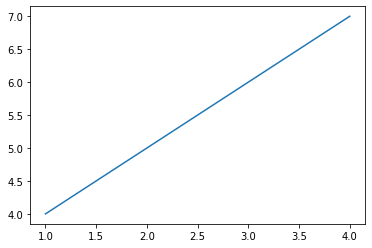

In [4]:
x = [ 1 , 2 , 3 ,4]
y = [ 4 , 5 , 6 ,7]
plt.plot(x,y)